In [11]:
# /*******************************************************************************
# *  script      : ejercicio_2.ipynb
# *  path        : n/a
# *  author      : Bolivar Alvarez
# *  release     : 1.|
# *  server      : Local
# *  instance    : n/a
# *  schema      : n/a
# *  assumptions : n/a
# *  uses        : n/a
# *  used by     : n/a
# *  parameters  : n/a
# *
# *******************************************************************************/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('uci_malware_detection.csv')

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.25, random_state=42)

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
clf.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)
ac = accuracy_score(Y_test,y_pred)
print(ac)

cm= confusion_matrix(Y_test,y_pred)
print(cm)

0.9787234042553191
[[72  1]
 [ 1 20]]


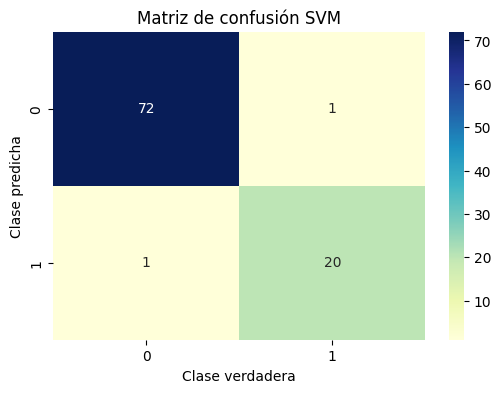

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title)
    plt.xlabel("Clase verdadera")
    plt.ylabel("Clase predicha")
    plt.show()

plot_confusion_matrix(cm, "Matriz de confusión SVM")

0.9893617021276596


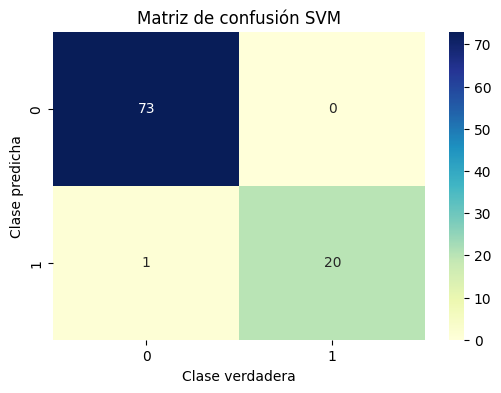

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

clf_2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
clf_2.fit(X_smote,Y_smote)

y_pred_2 = clf_2.predict(X_test)
ac = accuracy_score(Y_test,y_pred_2)
print(ac)

cm_2= confusion_matrix(Y_test,y_pred_2)
plot_confusion_matrix(cm_2, "Matriz de confusión SVM")